<a href="https://colab.research.google.com/github/abdelkadergelany/Intrusion-Detection-in-IoT-Based-Network/blob/main/Final_result/Protocol_NB15_Feature_Trasnformed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing  Libraries

In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder ,MinMaxScaler
from sklearn import preprocessing,svm,metrics

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

#Feature selection
from sklearn.feature_selection import chi2,RFE
from sklearn.feature_selection import SelectKBest
import xgboost, lightgbm
from sklearn.svm import SVR

# Data Processing

## Load Data

**UNSW-NB15: a comprehensive data set for network intrusion detection systems**


attack_cat: This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

Label: 0 for normal and 1 for attack records

In [2]:
!pip install -U -q PyDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Modified_dataset/NB15MOD/modified_training_data.csv"
modify_train = pd.read_csv(path,encoding='latin-1')

In [5]:
modify_train.head(2)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,class
0,1,1,0.121478,0.0,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.2956,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.0,0.0,0.0,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,normal
1,2,2,0.649902,0.0,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.9150,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.0,0.0,0.0,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,normal


In [ ]:
modify_train.info()

In [6]:
path = "/content/drive/MyDrive/Modified_dataset/NB15MOD/modified_testing_data.csv"
modify_test = pd.read_csv(path,encoding='latin-1')

In [11]:
combined_data = pd.concat([modify_train, modify_test]).drop(['Unnamed: 0','1'],axis=1)

In [12]:
combined_data.head(3)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,class
0,0.121478,0.0,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,normal
1,0.649902,0.0,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,normal
2,1.623129,0.0,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,normal


In [21]:
#Renaming the label colon
combined_data.rename(columns={'class': 'label'}, inplace=True)

In [14]:
combined_data.head(3)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,label
0,0.121478,0.0,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,normal
1,0.649902,0.0,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,normal
2,1.623129,0.0,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,normal


In [ ]:
# Load data
# train = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')
# test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')
# combined_data = pd.concat([train, test]).drop(['id'],axis=1)

In [15]:
# Look at the first 5 rows
combined_data.head(n=5)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,label
0,0.121478,0.0,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,normal
1,0.649902,0.0,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,normal
2,1.623129,0.0,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,normal
3,1.681642,0.0,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,normal
4,0.449454,0.0,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,normal


In [16]:
# information of the data: 
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2       257673 non-null  float64
 1   3       257673 non-null  float64
 2   4       257673 non-null  int64  
 3   5       257673 non-null  int64  
 4   6       257673 non-null  int64  
 5   7       257673 non-null  int64  
 6   8       257673 non-null  float64
 7   9       257673 non-null  int64  
 8   10      257673 non-null  int64  
 9   11      257673 non-null  float64
 10  12      257673 non-null  float64
 11  13      257673 non-null  int64  
 12  14      257673 non-null  int64  
 13  15      257673 non-null  float64
 14  16      257673 non-null  float64
 15  17      257673 non-null  float64
 16  18      257673 non-null  float64
 17  19      257673 non-null  int64  
 18  20      257673 non-null  int64  
 19  21      257673 non-null  int64  
 20  22      257673 non-null  int64  
 21  23      257

In [17]:
# check if there are Null values
combined_data.isnull().sum()

2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
label    0
dtype: int64

In [18]:
# Discard the rows with missing values

data_to_use = combined_data.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data_to_use.shape

(257673, 41)

<h1>Contamination mean pollution (outliers) in data</h1>

In [24]:
# Contaminsation mean pollution (outliers) in data
tmp = modify_train.where(modify_train['class'] == "normal").dropna()
contamination = round(1 - len(tmp)/len(modify_train), 2)
print("train contamination ", contamination)

tmp = modify_test.where(modify_test['class'] == "normal").dropna()
print("test  contamination ", round(1 - len(tmp)/len(modify_test),2),'\n')

if contamination > 0.5:
    print(f'contamination is {contamination}, which is greater than 0.5. Fixing...')
    contamination = round(1-contamination,2)
    print(f'contamination is now {contamination}')

train contamination  0.68
test  contamination  0.55 

contamination is 0.68, which is greater than 0.5. Fixing...
contamination is now 0.32


#Visualizing The Contamination





In [25]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

In [26]:
#Visualize Class ratio

def class_ratio(title,data):
    val_class = data['label'].values

    print('The class ratio for the  dataset:', data_ratio(val_class))
    sns.countplot(val_class,label="Sum").set_title(title + 'contamination ratio')

The class ratio for the original data: 1.8:1 (164673/93000)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


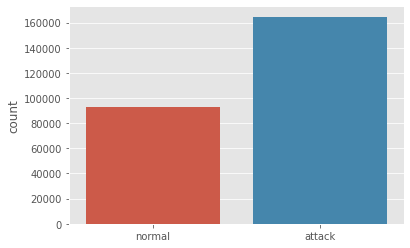

In [27]:
print('The class ratio for the original data:', data_ratio(combined_data['label'].values))
sns.countplot(combined_data['label'].values,label="Sum")
plt.show()

In [28]:
combined_data['label']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
82327    normal
82328    normal
82329    normal
82330    normal
82331    normal
Name: label, Length: 257673, dtype: object

In [29]:
combined_data.head(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,label
0,0.121478,0.0,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.2956,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.0,0.0,0.0,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,normal
1,0.649902,0.0,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.9150,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.0,0.0,0.0,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,normal


#Protocol Analyzer

In [31]:
#Explore different protocols
import collections
from tabulate import tabulate
counter = collections.Counter(combined_data['3'])  
print(tabulate(counter.most_common(),headers = ['Type','Occurences']))

  Type    Occurences
------  ------------
   0          123041
   0.5         92701
   1           41931


In [32]:
#Separate data according to protocol
udp_data = combined_data.where(combined_data['3'] == 0.5).dropna()
tcp_data = combined_data.where(combined_data['3'] == 0).dropna()
other_prot_data =  combined_data.where(combined_data['3'] != 0).dropna()
other_prot_data =  other_prot_data.where(other_prot_data['3'] != 0.5).dropna()


In [33]:
tcp_data.head(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,label
0,0.121478,0.0,6.0,4.0,258.0,172.0,74.087490,252.0,254.0,14158.942380,8495.365234,0.0,0.0,24.2956,8.375000,30.177547,11.830604,255.0,6.217727e+08,2.202534e+09,255.0,0.0,0.0,0.0,43.0,43.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,normal
1,0.649902,0.0,14.0,38.0,734.0,42014.0,78.473372,62.0,252.0,8395.112305,503571.312500,2.0,17.0,49.9150,15.432865,61.426934,1387.778330,255.0,1.417884e+09,3.077388e+09,255.0,0.0,0.0,0.0,52.0,1106.0,0.0,0.0,43.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,normal


The class ratio for the  dataset: 3.2:1 (70682/22019)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


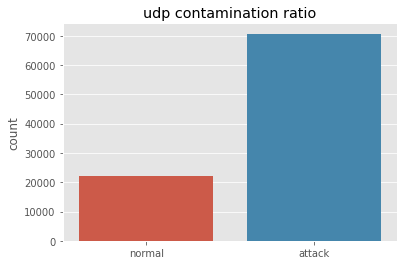

In [34]:
class_ratio('udp ',udp_data)


The class ratio for the  dataset: 0.8:1 (56072/66969)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


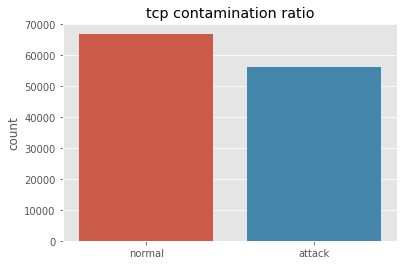

In [35]:
class_ratio('tcp ',tcp_data)


The class ratio for the  dataset: 9.5:1 (37919/4012)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


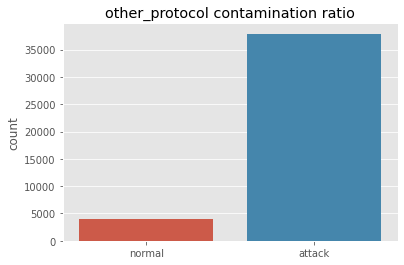

In [36]:
class_ratio('other_protocol ',other_prot_data)

# Resampling 

In [37]:
#Under sampling
!pip install imbalanced-learn


In [ ]:
import imblearn
print(imblearn.__version__)

In [39]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

<h1>define undersampling strategy</h1>

In [40]:
# define undersampling strategy
def undersampling(strategy,X_train, y_train):
    undersample = RandomUnderSampler(sampling_strategy=strategy)
    # fit and apply the transform
    X_over, y_over = undersample.fit_resample(X_train, y_train)
    return  X_over,y_over

<h1>define Oversampling strategy</h1>

In [41]:
# define Oversampling strategy
def oversampling(strategy,X_train, y_train):
    oversample = RandomOverSampler(sampling_strategy=strategy)
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    return  X_over,y_over

In [42]:
#tcp_data.shape
print(Counter(udp_data['label']))

Counter({'attack': 70682, 'normal': 22019})


#Encoding non numeric Values

In [43]:
#define function to encode categorical values from data
def encode_data(data):
    le1 = LabelEncoder()
    le = LabelEncoder()
    vector = data['label']

    print("attack cat:", set(list(vector))) # use print to make it print on single line 

    data['label'] = le1.fit_transform(vector)
    #data['proto'] = le.fit_transform(data['proto'])
    #data['service'] = le.fit_transform(data['service'])
    #data['state'] = le.fit_transform(data['state'])
    return data


In [44]:
udp_data = encode_data( udp_data)
tcp_data = encode_data( tcp_data)
other_prot_data = encode_data( other_prot_data)

attack cat: {'normal', 'attack'}
attack cat: {'normal', 'attack'}
attack cat: {'normal', 'attack'}


In [46]:
tcp_data.head(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,label
0,0.121478,0.0,6.0,4.0,258.0,172.0,74.087490,252.0,254.0,14158.942380,8495.365234,0.0,0.0,24.2956,8.375000,30.177547,11.830604,255.0,6.217727e+08,2.202534e+09,255.0,0.0,0.0,0.0,43.0,43.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.649902,0.0,14.0,38.0,734.0,42014.0,78.473372,62.0,252.0,8395.112305,503571.312500,2.0,17.0,49.9150,15.432865,61.426934,1387.778330,255.0,1.417884e+09,3.077388e+09,255.0,0.0,0.0,0.0,52.0,1106.0,0.0,0.0,43.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,1


#Normalizing Dataset

In [47]:
def normalize_data(data):
    scaler = preprocessing.MinMaxScaler()
    names = data.columns
    d = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(d, columns=names)
    return scaled_df

In [49]:
udp_data = normalize_data( udp_data)
tcp_data = normalize_data( tcp_data)
other_prot_data = normalize_data( other_prot_data)

In [50]:
udp_data.head(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,label
0,3.333555e-08,0.0,0.001957,0.0,0.000607,0.0,0.500000,0.995575,0.0,0.046092,0.0,0.0,0.0,2.370469e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030405,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.048387,0.0,0.0,0.0,0.016949,0.000000,0.0,1.0
1,2.000133e-07,0.0,0.001957,0.0,0.007407,0.0,0.083333,0.995575,0.0,0.078713,0.0,0.0,0.0,1.422281e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461486,0.0,0.0,0.0,0.096774,0.333333,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,1.0


<h1>Splitting the dataset</h1>

In [51]:
# droped label
udp_data_x = udp_data.drop(['label'], axis=1) 
udp_data_y = udp_data.loc[:,['label']]

tcp_data_x = tcp_data.drop(['label'], axis=1) 
tcp_data_y = tcp_data.loc[:,['label']]

other_data_x = other_prot_data.drop(['label'], axis=1) 
other_data_y = other_prot_data.loc[:,['label']]

udp_X_train, udp_X_test, udp_y_train, udp_y_test = train_test_split(udp_data_x, udp_data_y, test_size=.20, random_state=42) 
tcp_X_train, tcp_X_test, tcp_y_train, tcp_y_test = train_test_split(tcp_data_x, tcp_data_y, test_size=.20, random_state=42) 
other_X_train, other_X_test, other_y_train, other_y_test = train_test_split(other_data_x, other_data_y, test_size=.20, random_state=42) 

In [52]:
tcp_X_train.head(2)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
72284,0.004436,0.0,0.000845,0.000908,0.000055,0.000355,0.000071,0.146018,0.992126,0.000064,0.006279,0.000376,0.000545,0.001533,0.000476,0.000973,0.004118,1.0,0.009649,0.412728,1.0,0.012175,0.005538,0.009784,0.028826,0.346667,0.005814,0.000325,0.019608,0.166667,0.00000,0.00,0.000000,0.00000,0.0,0.0,0.033333,0.000000,0.02,0.0
43818,0.019327,0.0,0.001221,0.001089,0.000055,0.000046,0.000022,0.995575,0.992126,0.000015,0.000191,0.000564,0.001090,0.365794,0.142664,0.556225,0.058280,1.0,0.165243,0.998849,1.0,0.019506,0.009272,0.015235,0.012354,0.038000,0.000000,0.000000,0.117647,0.166667,0.06383,0.15,0.428571,0.09375,0.0,0.0,0.000000,0.050847,0.12,0.0


In [ ]:

# class_ratio('other_protocol ',udp_y_train)

In [ ]:
# x,y = oversampling('minority',udp_X_train,udp_y_train)

In [ ]:
#class_ratio('other_protocol ',y.values)
# print(Counter(y))

#Features selection

In [54]:
#Feature selection with chi2
def feat_select_chi2(data_x,data_y):
  chi2_selector = SelectKBest(chi2, k=25)
  X_train_kbest = chi2_selector.fit_transform(data_x, data_y)
  return X_train_kbest

In [55]:
#Feature selection with RFE
def feat_select_RFE(data_x,data_y):
  estimator = DecisionTreeClassifier()
  selector = RFE(estimator, n_features_to_select=25, step=1)
  data_transform = selector.fit_transform(data_x, data_y) 
  return data_transform

In [56]:
type(udp_y_train)

pandas.core.frame.DataFrame

<h1>Estimate score </h1>

In [57]:
# ===== Step 1: cross-validation ========

def estimate_score(clf,x_train,y_train):
    #clf = svm.SVC(kernel='linear') # Linear Kernel

    # define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    # define metrics for evaluating
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    #perform the 5-fold CV and get the metrics results
    cv_results = cross_validate(estimator=clf,
                            X = x_train,
                            y = y_train, 
                            scoring = scoring,
                            cv = cv,
                            return_train_score = False)
    return cv_results

In [58]:
# ======== Step 2: Evaluate the model using testing data =======

def evaluate_model(type,clf,x_train_d,x_test_d,y_train_d,y_test_d):
    
    # fit the Logistic Regression model
    if type == 'knn':
        clf.fit(X=x_train_d)
    else:
        clf.fit(X=x_train_d, y=y_train_d)

    # predition on testing data
    y_pred_class = clf.predict(X=x_test_d)
    #y_pred_score = clf.predict_proba(X=x_test_d)[:, 1]

    # AUC of ROC
   # auc_ontest = roc_auc_score(y_true=y_test_d, y_score=y_pred_score)
    # confusion matrix
    cm_ontest = confusion_matrix(y_true=y_test_d, y_pred=y_pred_class)
    # precision score
    precision_ontest = precision_score(y_true=y_test_d, y_pred=y_pred_class)
    # recall score
    recall_ontest = recall_score(y_true=y_test_d, y_pred=y_pred_class)
    # classifition report
    cls_report_ontest = classification_report(y_true=y_test_d, y_pred=y_pred_class)

    # print the above results
    #print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
    print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
    print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
    print('Confusion Matrix:\n', cm_ontest)
    # Print classification report:
    print('Classification Report:\n', cls_report_ontest)

<h1>Print CV _Results</h1>

In [59]:
def print_cv_results(cv_results):
    for key, value in cv_results.items(): 
      print( key,value.mean())

#UDP Modul

<h1>Estimation of SVM on Chi2 </h1>

In [60]:
clf_svm = svm.SVC(kernel='linear')
estimation = estimate_score(clf_svm,feat_select_chi2(udp_X_train,udp_y_train),udp_y_train['label'].values)
print_cv_results(estimation)

fit_time 42.89313154220581
score_time 6.803007173538208
test_accuracy 0.9301779935275081
test_precision 0.9875280190645975
test_recall 0.7161119573495811
test_f1 0.8301696073556201
test_roc_auc 0.9818994541798048


<h1>Estimation of SVM on RFE </h1>

In [61]:
estimation = estimate_score(clf_svm,feat_select_RFE(udp_X_train,udp_y_train),udp_y_train['label'].values)
print_cv_results(estimation)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit_time 44.54356408119202
score_time 6.87006893157959
test_accuracy 0.9301779935275081
test_precision 0.9875280190645975
test_recall 0.7161119573495811
test_f1 0.8301696073556201
test_roc_auc 0.9819185581122157


<h1>Evaluation of Chi2-SVM on Test data</h1>

In [62]:
evaluate_model('null',clf_svm,feat_select_chi2(udp_X_train,udp_y_train),feat_select_chi2(udp_X_test,udp_y_test),udp_y_train['label'].values,udp_y_test['label'].values)

The precision score on the test set: 0.99809
The recall score on the test set: 0.72162
Confusion Matrix:
 [[14192     6]
 [ 1209  3134]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     14198
         1.0       1.00      0.72      0.84      4343

    accuracy                           0.93     18541
   macro avg       0.96      0.86      0.90     18541
weighted avg       0.94      0.93      0.93     18541



<h1>Evaluation of RFE-SVM on Test data</h1>

In [63]:
evaluate_model('null',clf_svm,feat_select_RFE(udp_X_train,udp_y_train),feat_select_RFE(udp_X_test,udp_y_test),udp_y_train['label'].values,udp_y_test['label'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The precision score on the test set: 0.99777
The recall score on the test set: 0.72162
Confusion Matrix:
 [[14191     7]
 [ 1209  3134]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     14198
         1.0       1.00      0.72      0.84      4343

    accuracy                           0.93     18541
   macro avg       0.96      0.86      0.90     18541
weighted avg       0.94      0.93      0.93     18541



<h1> Evaluation of KNN on Chi2 </h1>



In [64]:
%%capture 
!pip install pyod

In [65]:
from pyod.models import lof, cblof, cof, pca, iforest, knn, mcd, ocsvm, sod, abod, hbos #, auto_encoder, vae
contamination = 0.4
threshold = 0.75

The class ratio for the  dataset: 3.2:1 (56484/17676)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


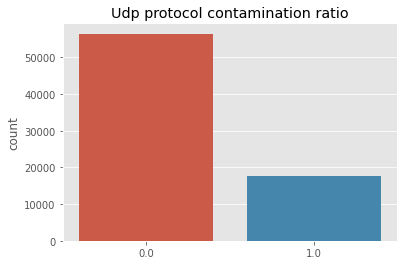

In [66]:

class_ratio('Udp protocol ',udp_y_train)

In [ ]:

print(Counter(udp_y_train))

In [67]:
#Resample udp dataset for KNN
# x_resampled, y_resampled = oversampling('minority',udp_X_train,udp_y_train)
tmp_normal = udp_data.where(udp_data['label'] == 1).dropna()
tmp_attack = udp_data.where(udp_data['label'] == 0).dropna()
#tmp_normal = pd.concat([tmp_normal, tmp_attack.sample(n=50000)])
tmp_normal = pd.concat([tmp_normal, tmp_normal])
tmp_normal = pd.concat([tmp_normal, tmp_normal])
tmp_normal = pd.concat([tmp_normal, tmp_attack.sample(n=5000)])
udp_data_x = tmp_normal.drop(['label'], axis=1) 
udp_data_y = tmp_normal.loc[:,['label']]
udp_X_train, udp_X_test, udp_y_train, udp_y_test = train_test_split(udp_data_x, udp_data_y, test_size=.20, random_state=42) 


In [68]:
tmp_normal.shape

(93076, 41)

The class ratio for the  dataset: 0.1:1 (4009/70451)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


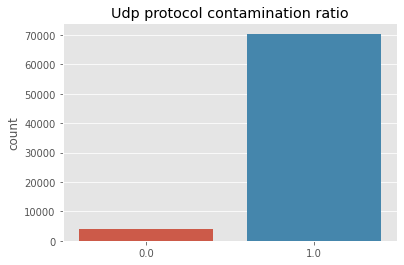

In [69]:
#Verify resampling
class_ratio('Udp protocol ',udp_y_train)

In [70]:
#Evaluate Chi2-knn For resampled data
Xdd = feat_select_chi2(udp_X_train,udp_y_train)
knn_clf = knn.KNN(contamination=contamination, radius=1.5, n_neighbors=20, n_jobs=-1) #TODO radius
_ = knn_clf.fit(Xdd)
evaluate_model('knn',knn_clf,feat_select_chi2(udp_X_train,udp_y_train),feat_select_chi2(udp_X_test,udp_y_test),udp_y_train['label'].values,udp_y_test['label'].values)

The precision score on the test set: 0.88926
The recall score on the test set: 0.37589
Confusion Matrix:
 [[  166   825]
 [11000  6625]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.01      0.17      0.03       991
         1.0       0.89      0.38      0.53     17625

    accuracy                           0.36     18616
   macro avg       0.45      0.27      0.28     18616
weighted avg       0.84      0.36      0.50     18616



In [ ]:
#checking the Oversampling
print(Counter(y_resampled))

In [ ]:
# #Evaluate Chi2-knn
# Xdd = feat_select_chi2(udp_X_train,udp_y_train)
# knn_clf = knn.KNN(contamination=contamination, radius=1.5, n_neighbors=20, n_jobs=-1) #TODO radius
# _ = knn_clf.fit(Xdd)
# evaluate_model('knn',knn_clf,feat_select_chi2(udp_X_train,udp_y_train),feat_select_chi2(udp_X_test,udp_y_test),udp_y_train['label'].values,udp_y_test['label'].values)


<h1> Evaluation of KNN on RFE </h1>


In [72]:
#Evaluate RFE-knn
Xdd = feat_select_RFE(udp_X_train,udp_y_train)
knn_clf = knn.KNN(contamination=contamination, radius=1.5, n_neighbors=20, n_jobs=-1) #TODO radius
_ = knn_clf.fit(Xdd)
evaluate_model('knn',knn_clf,feat_select_RFE(udp_X_train,udp_y_train),feat_select_RFE(udp_X_test,udp_y_test),udp_y_train['label'].values,udp_y_test['label'].values)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The precision score on the test set: 0.94677
The recall score on the test set: 1.00000
Confusion Matrix:
 [[    0   991]
 [    0 17625]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       991
         1.0       0.95      1.00      0.97     17625

    accuracy                           0.95     18616
   macro avg       0.47      0.50      0.49     18616
weighted avg       0.90      0.95      0.92     18616



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# TCP Module

<h1> DT-Chi2  </h1>

<h1>Estimate DT-Chi2</h1>




In [73]:
clf_DT = DecisionTreeClassifier(random_state=123)

estimation = estimate_score(clf_DT,feat_select_chi2(tcp_X_train,tcp_y_train),tcp_y_train['label'].values)
print_cv_results(estimation)

fit_time 1.3624383926391601
score_time 0.05480847358703613
test_accuracy 0.8969339047694509
test_precision 0.9045109044497647
test_recall 0.9061717132978281
test_f1 0.9053372693925382
test_roc_auc 0.8960455440759741


<h1>Evaluate DT-Chi2</h1>


In [74]:
evaluate_model('null',clf_DT,feat_select_chi2(tcp_X_train,tcp_y_train),feat_select_chi2(tcp_X_test,tcp_y_test),tcp_y_train['label'].values,tcp_y_test['label'].values)

The precision score on the test set: 0.83615
The recall score on the test set: 0.89222
Confusion Matrix:
 [[ 8825  2349]
 [ 1448 11987]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82     11174
         1.0       0.84      0.89      0.86     13435

    accuracy                           0.85     24609
   macro avg       0.85      0.84      0.84     24609
weighted avg       0.85      0.85      0.84     24609



<h1>Estimate DT-RFE</h1>


In [75]:
estimation = estimate_score(clf_DT,feat_select_RFE(tcp_X_train,tcp_y_train),tcp_y_train['label'].values)
print_cv_results(estimation)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit_time 1.9966489791870117
score_time 0.05465817451477051
test_accuracy 0.8959281515238009
test_precision 0.9056650981785859
test_recall 0.9026786312332339
test_f1 0.9041608581083921
test_roc_auc 0.8952789237743302


<h1>Evaluate DT-RFE</h1>


In [76]:
evaluate_model('null',clf_DT,feat_select_chi2(tcp_X_train,tcp_y_train),feat_select_RFE(tcp_X_test,tcp_y_test),tcp_y_train['label'].values,tcp_y_test['label'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The precision score on the test set: 0.56008
The recall score on the test set: 0.12386
Confusion Matrix:
 [[ 9867  1307]
 [11771  1664]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.88      0.60     11174
         1.0       0.56      0.12      0.20     13435

    accuracy                           0.47     24609
   macro avg       0.51      0.50      0.40     24609
weighted avg       0.51      0.47      0.38     24609



<h1>Estimate LR-Chi2</h1>


In [77]:

clf_LR = LogisticRegression(solver='lbfgs', random_state=123, max_iter = 4000)

estimation = estimate_score(clf_LR,feat_select_chi2(tcp_X_train,tcp_y_train),tcp_y_train['label'].values)
print_cv_results(estimation)

fit_time 3.6223566055297853
score_time 0.07311415672302246
test_accuracy 0.8400113875001646
test_precision 0.9273885933884973
test_recall 0.7658496597662747
test_f1 0.838873269988424
test_roc_auc 0.9379671969160791


<h1>Evaluate LR-Chi2</h1>


In [78]:
evaluate_model('null',clf_LR,feat_select_chi2(tcp_X_train,tcp_y_train),feat_select_RFE(tcp_X_test,tcp_y_test),tcp_y_train['label'].values,tcp_y_test['label'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The precision score on the test set: 0.68612
The recall score on the test set: 0.71053
Confusion Matrix:
 [[6807 4367]
 [3889 9546]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.61      0.62     11174
         1.0       0.69      0.71      0.70     13435

    accuracy                           0.66     24609
   macro avg       0.66      0.66      0.66     24609
weighted avg       0.66      0.66      0.66     24609



<h1>Estimate LR-RFE</h1>


In [79]:
estimation = estimate_score(clf_LR,feat_select_RFE(tcp_X_train,tcp_y_train),tcp_y_train['label'].values)
print_cv_results(estimation)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit_time 2.8397776603698732
score_time 0.07352972030639648
test_accuracy 0.8374817292641419
test_precision 0.9164444751545922
test_recall 0.771565666957535
test_f1 0.8377579398909443
test_roc_auc 0.9361290889856428


<h1>Evaluate LR-RFE</h1>


In [80]:
evaluate_model('null',clf_LR,feat_select_RFE(tcp_X_train,tcp_y_train),feat_select_RFE(tcp_X_test,tcp_y_test),tcp_y_train['label'].values,tcp_y_test['label'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The precision score on the test set: 0.54562
The recall score on the test set: 0.99873
Confusion Matrix:
 [[    0 11174]
 [   17 13418]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     11174
         1.0       0.55      1.00      0.71     13435

    accuracy                           0.55     24609
   macro avg       0.27      0.50      0.35     24609
weighted avg       0.30      0.55      0.39     24609



# Other Protocols  Modul

<h1>EStimate MLP-Chi2</h1>

In [81]:
clf_MLP = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

estimation = estimate_score(clf_MLP,feat_select_chi2(other_X_train,other_y_train),other_y_train['label'].values)
print_cv_results(estimation)

fit_time 11.513382816314698
score_time 0.036709928512573244
test_accuracy 0.998956603208268
test_precision 1.0
test_recall 0.9889991410207044
test_f1 0.9944648775146204
test_roc_auc 0.9996201481098577


<h1>Evaluate MLP-Chi2</h1>

In [82]:
evaluate_model('null',clf_MLP,feat_select_chi2(other_X_train,other_y_train),feat_select_chi2(other_X_test,other_y_test),other_y_train['label'].values,other_y_test['label'].values)

The precision score on the test set: 1.00000
The recall score on the test set: 0.98916
Confusion Matrix:
 [[7557    0]
 [   9  821]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7557
         1.0       1.00      0.99      0.99       830

    accuracy                           1.00      8387
   macro avg       1.00      0.99      1.00      8387
weighted avg       1.00      1.00      1.00      8387



<h1>EStimate MLP-RFE</h1>

In [83]:
estimation = estimate_score(clf_MLP,feat_select_RFE(other_X_train,other_y_train),other_y_train['label'].values)
print_cv_results(estimation)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit_time 10.87266583442688
score_time 0.038771629333496094
test_accuracy 0.9987181131478795
test_precision 1.0
test_recall 0.986483911416526
test_f1 0.993186967478057
test_roc_auc 0.9994439367428857


<h1>Evaluate MLP-RFE</h1>

In [84]:
evaluate_model('null',clf_MLP,feat_select_RFE(other_X_train,other_y_train),feat_select_RFE(other_X_test,other_y_test),other_y_train['label'].values,other_y_test['label'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The precision score on the test set: 1.00000
The recall score on the test set: 0.98795
Confusion Matrix:
 [[7557    0]
 [  10  820]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7557
         1.0       1.00      0.99      0.99       830

    accuracy                           1.00      8387
   macro avg       1.00      0.99      1.00      8387
weighted avg       1.00      1.00      1.00      8387

